# 1. A/B–тестирование

#### 1.1 Условие  
В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика.  
Необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.  

#### 1.2 Входные данные
В качестве входных данных Вы имеете 3 csv-файла:
- groups.csv : файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа)
- active_studs.csv : файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.
- checks.csv : файл с информацией об оплатах пользователей в дни проведения эксперимента.

#### 1.3 Вопросы  
Предлагаем Вам ответить на следующие вопросы:
- На какие метрики Вы смотрите в ходе анализа и почему?
- Имеются ли различия в показателях и с чем они могут быть связаны?
- Являются ли эти различия статистически значимыми?
- Стоит ли запускать новую механику на всех пользователей?  


Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на
собственный план.

#### 1.4 Требования к ответу  
- При выполнении тестового задания необходимо использовать язык программирования Python.
- В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете
с данными.
- Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.


#### 1.5 Решение


#### ШАГ 1: Подготовка к анализу
- импортируем библиотеки, 
- загружаем данные,
- проверяем данные,
- формируем план анализа.

In [1]:
# Загружаем библеотики.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from math import sqrt
import seaborn as sns


In [2]:
# Читаем данные:

# принадлежность пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа).
df_groups = pd.read_csv('https://raw.githubusercontent.com/zhukov-analyst/test_tasks/main/uchi.ru/data/groups.csv', sep=';')

# пользователи, которые зашли на платформу в дни проведения эксперимента.
df_active_studs = pd.read_csv('https://raw.githubusercontent.com/zhukov-analyst/test_tasks/main/uchi.ru/data/active_studs.csv')

# оплата пользователей в дни проведения эксперимента.
df_checks = pd.read_csv('https://raw.githubusercontent.com/zhukov-analyst/test_tasks/main/uchi.ru/data/checks.csv', sep=';')

In [3]:
# Проверяем данные на анамалии и изучаем для выстраивания дальнейшей логики работы.

def describe_data(df):
    display(df.head(10))
    print('---------------------------------------------------')
    print(df.info())
    print('---------------------------------------------------')
    print(df.describe())
    print('---------------------------------------------------')
    print('Пропуски:')
    print(df.isna().sum())
    print('---------------------------------------------------')
    print('Дубликаты:', df.duplicated().sum())
    print()

describe_data(df_groups)
describe_data(df_active_studs)
describe_data(df_checks)

,id,grp
0,1206794,B
1,331024,B
2,1733498,A
3,161574,B
4,168443,B
5,172064,A
6,176564,B
7,199038,B
8,214114,A
9,227004,A


---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74576 entries, 0 to 74575
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74576 non-null  int64 
 1   grp     74576 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None
---------------------------------------------------
                 id
count  7.457600e+04
mean   2.165617e+06
std    2.786959e+06
min    1.489000e+03
25%    9.197188e+05
50%    1.669752e+06
75%    3.328121e+06
max    2.010677e+08
---------------------------------------------------
Пропуски:
id     0
grp    0
dtype: int64
---------------------------------------------------
Дубликаты: 0



,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
5,5481015
6,1353433
7,1394612
8,1170611
9,491277


---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB
None
---------------------------------------------------
         student_id
count  8.341000e+03
mean   2.448547e+06
std    1.564978e+06
min    1.627000e+03
25%    1.118405e+06
50%    2.094192e+06
75%    3.638877e+06
max    5.951797e+06
---------------------------------------------------
Пропуски:
student_id    0
dtype: int64
---------------------------------------------------
Дубликаты: 0



,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
5,100645,630.0
6,102534,580.0
7,106837,290.0
8,108270,290.0
9,114366,690.0


---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB
None
---------------------------------------------------
         student_id          rev
count  5.410000e+02   541.000000
mean   2.514772e+06  1059.752317
std    1.726839e+06   762.712359
min    1.627000e+03   199.000000
25%    9.871290e+05   290.000000
50%    2.526021e+06   840.000000
75%    3.993249e+06  1900.000000
max    5.740903e+06  4650.000000
---------------------------------------------------
Пропуски:
student_id    0
rev           0
dtype: int64
---------------------------------------------------
Дубликаты: 0



**Данные**  
С данными всё поряке. Пропусков нет. Все форматы данных соответствуют содержанию.  
Можно работать дальше. 


**План анализа**

_Выборка_  
В начале небходимо из имеющихся данных сформировать выборку исследования.  

Из всей совокупности размеченных пользователей мы имеем информацию о активных пользователях в дни эксперемента и о совершавших оплату.  
Для пользователей совершивших оплату мы знаем величину денежной транзакции.  


Таким образом совокупно имеется четыре сегмента:  

<table align="left">
	<tr>
		<th></th>
        <th>Группа A</th>
		<th>Группа B</th>
 	</tr>
    <tr>
		<th>Оплата есть</th>
		<th>seg №1</th>
        <th>seg №2</th>
 	</tr>
 	<tr>
		<th>Оплаты нет</th>
		<th>seg №3</th>
        <th>seg №4</th>
 	</tr>

</table> 


_Метрика_  
Основной метрикой анализа является величина денежной транзакции в контрольной и эксперементальной группах.
Дополнительно возможно оценить соотношение групп пользователей к факту оплаты.

_Инструмент_  
После изучения данных можно будет выбрать подходящий метод анализа.


#### ШАГ 2: Готовим выборку пользователей

На основе таблицы всех активных пользователей (active_studs) добавим информацию об оплате (checks) и о сегментации на группы (groups).

In [4]:
# Подготавливаем таблицы для объединения.
# Переименовываем название столбца в groups.

df_groups=df_groups.rename(columns = {'id':'student_id'})
df_groups.head()


,student_id,grp
0,1206794,B
1,331024,B
2,1733498,A
3,161574,B
4,168443,B


In [5]:
# Поочередно объединяем таблицы, следуюя следующей логике:
# active_studs LEFT JOIN checks - получаем общюю совокупность активных пользователей с информацией о оплате;
# INNER JOIN groups - дополняем данные информацией о принадлежности к контрольной или эксперементальной группе.

df_total = pd.merge(df_active_studs, df_checks, how = 'left', on = ('student_id'))
df_total = pd.merge(df_total, df_groups, how = 'inner', on = ('student_id'))

df_total

,student_id,rev,grp
0,581585,NaN,A
1,5723133,NaN,A
2,3276743,NaN,B
3,4238589,NaN,A
4,4475369,NaN,B
...,...,...,...
8336,1794344,NaN,B
8337,296883,NaN,B
8338,3598448,NaN,B
8339,3610547,290.0,B


In [6]:
# Добавим ещё столбец с логической отметкой о факте оплаты.  
# Он может понадобиться на этапе построения дополнительных графиков.

df_total['rev_2'] = np.where(df_total['rev'] > 0, 1, 0)
df_total['rev_2'] = df_total['rev_2'].astype('bool')

# Добавим отдельно столбцы для группы A и B для простоты построения графиков.
df_total['A'] = np.where(df_total['grp'] == 'A', df_total['rev']*1.0, np.nan)
df_total['B'] = np.where(df_total['grp'] == 'B', df_total['rev']*1.0, np.nan)

df_total

,student_id,rev,grp,rev_2,A,B
0,581585,NaN,A,False,NaN,NaN
1,5723133,NaN,A,False,NaN,NaN
2,3276743,NaN,B,False,NaN,NaN
3,4238589,NaN,A,False,NaN,NaN
4,4475369,NaN,B,False,NaN,NaN
...,...,...,...,...,...,...
8336,1794344,NaN,B,False,NaN,NaN
8337,296883,NaN,B,False,NaN,NaN
8338,3598448,NaN,B,False,NaN,NaN
8339,3610547,290.0,B,True,NaN,290.0


In [7]:
# Проверяем правильность созданной таблицы.

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8341 entries, 0 to 8340
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  8341 non-null   int64  
 1   rev         392 non-null    float64
 2   grp         8341 non-null   object 
 3   rev_2       8341 non-null   bool   
 4   A           78 non-null     float64
 5   B           314 non-null    float64
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 399.1+ KB


Всё готово для анализа.

#### ШАГ 3: Описательный анализ данных.


In [17]:
# Посмотрим таблицу с общей статистической информацией.

df_total_stat = df_total.describe()
df_total_stat

,student_id,rev,A,B
count,8.341000e+03,392.000000,78.000000,314.000000
mean,2.448547e+06,1193.352050,933.589744,1257.878992
std,1.564978e+06,827.136901,919.932711,790.864254
min,1.627000e+03,199.000000,199.000000,199.000000
25%,1.118405e+06,290.000000,290.000000,511.750000
50%,2.094192e+06,990.000000,585.000000,1140.000000
75%,3.638877e+06,1900.000000,1114.750000,1900.000000
max,5.951797e+06,4650.000000,3660.000000,4650.000000


**Промежуточные наблюдения**  

Из 8341 активных пользователей только 392 совершили оплату в дни проведения эксперемента - это меньше 5%.  
Неизвестно является ли это нормальным коэффициентом конверсии, из имеющихся данных нельзя сделать выводы.  

Всего в эксперементе приняли участие 392 пользователя в соотношении 80% B-группа и 20% A-группа.  

По данным о средних и стандартных отклонениях можно наблюдать видимые различия.  
Для статистической проверки необходимо проверить данные на нормальность распредления и выбрать статистический инструмент. 

В данных скорее всего отсутсвуют серьезные выбросы, но всё равно проверим с помощью boxplot.

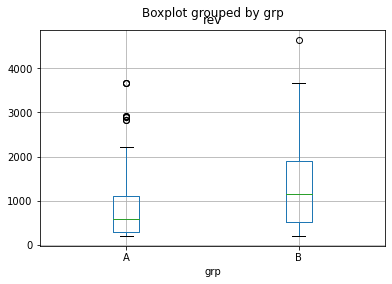

95й и 99й перцентили: [2220. 3660.]


In [18]:
# Проверяем на выбросы.

# Изучаем boxplot.

df_total.boxplot(column='rev',by='grp', showfliers=True)
plt.show()


# Смотрим на крайние вверхние значения.

print('95й и 99й перцентили:', np.nanpercentile(df_total[['rev']], [95, 99]))


Несколько выбросов всё же имеются.  
Больше их у группы A, но возможно это имеет объяснение.

В целом, менее 5% пользователей совершают оплату выше 2220, менее 1% выше 3660.

Далее изучим распредление выборок.

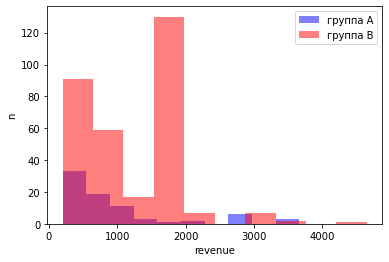

In [19]:
# Проверим распредление выборок на нормальность.

a = df_total['A']
b = df_total['B']

plt.hist(a, bins=10, edgecolor='None', alpha = 0.5, color= 'b', label = 'группа A')
plt.hist(b, bins=10, edgecolor='None', alpha = 0.5, color= 'r', label = 'группа B')

plt.ylabel('n')
plt.xlabel('revenue')
plt.legend()
plt.show()

Распределение данных не похоже на нормальное.  
Для обеих выборок свойственна правостороняя ассиметрия в сторону низкой стоимости.  
Однако есть небольшой "горб" ближе к 3000 - видимо, сегмент премиальных продуктов.

Ярко выделяется "свеча" в группе B в районе 2000 - возможно это связано с изменением механики оплаты или же это иное проявление маркетинговой активности. В любом случае, делать выводы только на основании гистограммы некорретно, т.к. данные о выборках представлены в разном объеме (A = 78, B = 314 наблюдений).  

#### ШАГ 4: Статистическая проверка гипотезы.



Для проверки наличия статистических различий между выборками A и B следует воспользоваться t-критерием Стьюдента для несвязных выборок - посколько данные непрерывные количественные, выборка достаточная.

Нулевая гипотеза: revenue в группах A и B одинаковая.  
Альтернативная гипотеза: revenue в группах A и B существенно различается.  

Уровень статистической значимости примем за 0.05.


In [22]:
# t-критерием Стьюдента

# Задаём входные данные.
mean_A = df_total_stat['A']['mean']
mean_B = df_total_stat['B']['mean']

sd_A = df_total_stat['A']['std']
sd_B = df_total_stat['B']['std']

n_A = df_total_stat['A']['count']
n_B = df_total_stat['B']['count']

# Расчитываем SE
SE = sqrt(((sd_A ** 2) / n_A) + ((sd_B ** 2) / n_B))

# Расчитываем число степеней свободы
df = n_A + n_B - 2

# Расчитывает t-критерий Стьюдента
t_value = (mean_A - mean_B) / SE

# Расчитвает p-критерий значимости
p_score = stats.t.sf(np.abs(t_value), df)*2

print(f'p_score = ', p_score)
if p_score >= 0.05:
    print('Мы НЕ можем отклонить нулевую гипотезу')
else:
    print('Мы можем отклонить нулевую гипотезу')



p_score =  0.0044409391801694615
Мы можем отклонить нулевую гипотезу


**Вывод**  

Предварительная оценка данных показала схожесь общего паттерна распредления revenue в контрольной и тестовой группе, с ярким отклонением эксперементальной группы возде одного конкретного числа (2000). Это может быть связано с особенностями проведения A/B-теста или иной маркетинговой активностью - необходимо разбираться подробнее.

Помимо этой яркой особенности, никаких других серьезных анамалий не обнаружено.


Статистические анализ t-критерием Стьюдента потвердил значимость различий показателя revenue между двумя группами выборок.  
Эксперементальная группа B показала лучший результат (mean 933) по сравнению с контрольной группой (mean 1257).
Можно рекомендовать внедрение новой системы оплаты.

---

In [23]:
# Импортируем библиотеку для работы с sql прямо в jupiter.

import sqlite3

## 2. SQL

### 2.1 Очень усердные ученики.

#### 2.1.1 Условие  
Образовательные курсы на uchi.ru состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".  
Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин за час.

#### 2.1.2 Задача
Дана таблица **peas**:  

<table align="left">
	<tr>
		<th>Название атрибута</th>
		<th>Тип атрибута</th>
		<th>Смысловое значение</th>
 	</tr>
 	<tr>
  		<td>st_id</td>
   		<td>int</td>
		<td>ID ученика</td>
 	</tr>
	<tr>
  		<td>timest</td>
   		<td>timestamp</td>
		<td>Время решения карточки</td>
 	</tr>
	<tr>
  		<td>correct</td>
   		<td>bool</td>
		<td>Правильно ли решена горошина?</td>
 	</tr>
	<tr>
  		<td>subject</td>
   		<td>text</td>
		<td>Дисциплина, в которой находится горошина</td>
 	</tr>
</table> 

Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов за март 2020 года.

#### 2.1.3 Решение


Решение задачи реализовано непосредственно в jupyter на языке sqlite3.

In [24]:
# Импортируем библеотеки. Создаём подключение к БД.

import pandas as pd
import numpy as np
import sqlite3

con = sqlite3.connect('db_uchiru')

В начале создадим датасет аналогично таблице **peas** для проверки создаваемого кода. 

In [25]:
# Создаём вручную небольшой датасет, в котором:
    # 3 пользователя по 5 записей;
    # каждый пользователь в разное время решал горошины;
    # каждый пользователь часть горошин решил правильно, часть неправильно;
    # каждый пользователь участвует в нескольких курсах.

# В рамках проверочного датасета я изменю требование к усердному студенту с 20 горошин/час на 3 горошины/час,
# но в итоговом коде вернусь к изначальному требованию. 

df = pd.DataFrame({
    'st_id':[
        1,1,1,1,1,
        2,2,2,2,2,
        3,3,3,3,3], 
    'timest':pd.to_datetime([
        '2020-03-01 00:23:00','2020-03-01 00:11:00','2020-03-01 00:36:00','2020-03-01 00:45:00','2020-03-01 00:02:00',
        '2020-01-01 00:01:00','2020-01-01 00:56:00','2020-01-01 00:23:00','2020-01-01 00:33:00','2020-01-01 00:27:00',
        '2020-03-01 00:17:00','2020-03-01 00:23:00','2020-03-01 00:36:00','2020-03-01 00:26:00','2020-03-01 00:55:00'],
        format='%Y-%m-%d %H:%M:%S'), 
    'correct':[
        'true','true','true','false','true',
        'true','true','false','true','true',
        'false','false','true','true','true'], 
    'subject':[
        'a','a','a','a','b',
        'a','b','b','b','b',
        'a','c','c','c','c']
})

# Посмотрим на датасет.
df

,st_id,timest,correct,subject
0,1,2020-03-01 00:23:00,true,a
1,1,2020-03-01 00:11:00,true,a
2,1,2020-03-01 00:36:00,true,a
3,1,2020-03-01 00:45:00,false,a
4,1,2020-03-01 00:02:00,true,b
5,2,2020-01-01 00:01:00,true,a
6,2,2020-01-01 00:56:00,true,b
7,2,2020-01-01 00:23:00,false,b
8,2,2020-01-01 00:33:00,true,b
9,2,2020-01-01 00:27:00,true,b


In [26]:
# Проверим правильность форматов данных в датасете.
# SQlite не имеет отдельного формата bool, поэтому позже для удобство переведем true/false в 1/0.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   st_id    15 non-null     int64         
 1   timest   15 non-null     datetime64[ns]
 2   correct  15 non-null     object        
 3   subject  15 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 608.0+ bytes


In [27]:
# Все отлично. Заливаем таблицу в sql.

df.to_sql('peas',con,index=False,if_exists='replace')

**Переходим к SQL.**

In [28]:
# Посмотрим на получившуюся таблицу через sql.

sql = '''
SELECT 
p.*
FROM peas AS p
'''

In [29]:
pd.read_sql(sql, con)

,st_id,timest,correct,subject
0,1,2020-03-01 00:23:00,true,a
1,1,2020-03-01 00:11:00,true,a
2,1,2020-03-01 00:36:00,true,a
3,1,2020-03-01 00:45:00,false,a
4,1,2020-03-01 00:02:00,true,b
5,2,2020-01-01 00:01:00,true,a
6,2,2020-01-01 00:56:00,true,b
7,2,2020-01-01 00:23:00,false,b
8,2,2020-01-01 00:33:00,true,b
9,2,2020-01-01 00:27:00,true,b


В решении задачи необходимо задействовать оконные функции и скользящие операторы. 


Общая логика решения следующая:  
- ШАГ 1: в рамках каждого id и subject выявить разницу в датах между соседними строками, перед этим упорядочив даты;
- ШАГ 2: посчитать скользящей функцией сумму 3 разниц в датах;
- ШАГ 3: посчитать скользящей функцией сумму 3 решенных горошин;
- ШАГ 4: добавить условие отбора данных (срок решения меньше часа, правильно решено 3 горошины, март 2020 г.);
- ШАГ 5: оставить в качестве ответа только количество пользователей.

In [30]:
# ШАГ 1: в рамках каждого id и subject выявить разницу в датах между соседними строками, перед этим упорядочив даты.

# Создаём новый столбец "timest_diff", который является разницей в минутах между текущей и предыдущей датой.
# Используем оконную функцию для расчета по каждому студенту и по каждому предмету.

# Для удобства создаём вспомогательный столбец "correct_new", в котором отмечены флагом "1,NaN" правильно решенные горошины. 


sql = '''
SELECT
p.*,
round((julianday(p.timest) - julianday(lag(p.timest)
    OVER (partition by p.st_id, p.subject
    ORDER BY  p.timest, p.subject))) * 24 * 60) AS timest_diff,
CASE
    WHEN (p.correct = 'true' OR p.correct = 1) THEN 1
    ELSE null
    END AS correct_flag
FROM peas AS p
'''


In [31]:
pd.read_sql(sql, con)

,st_id,timest,correct,subject,timest_diff,correct_flag
0,1,2020-03-01 00:11:00,true,a,NaN,1.0
1,1,2020-03-01 00:23:00,true,a,12.0,1.0
2,1,2020-03-01 00:36:00,true,a,13.0,1.0
3,1,2020-03-01 00:45:00,false,a,9.0,NaN
4,1,2020-03-01 00:02:00,true,b,NaN,1.0
5,2,2020-01-01 00:01:00,true,a,NaN,1.0
6,2,2020-01-01 00:23:00,false,b,NaN,NaN
7,2,2020-01-01 00:27:00,true,b,4.0,1.0
8,2,2020-01-01 00:33:00,true,b,6.0,1.0
9,2,2020-01-01 00:56:00,true,b,23.0,1.0


In [32]:
# ШАГ 2: посчитать скользящей функцией сумму 3 разниц в датах.
# ШАГ 3: посчитать скользящей функцией сумму 3 решенных горошин.

# Убираем код с предыдущего шага в подзапрос через with.
# Добавляем столбец "moving_sum_timest_diff" - скользящая сумма разниц в датах с шагом два:
# Добавляем столбец "moving_sum_correct" - скользящая сумма правильно решенных горошин с шагом три.
    # шаг меньше на один, т.к. мы суммируем по столбцу timest_diff, где для первого значения уже учли значения выше него.
# Используем оконную функцию для расчета по каждому студенту и по каждому предмету.


sql = '''
with peas_new AS 
    (SELECT
    p.*,
    round((julianday(p.timest) - julianday(lag(p.timest)
        OVER (partition by p.st_id, p.subject
        ORDER BY  p.timest, p.subject))) * 24 * 60) AS timest_diff,
    CASE
        WHEN (p.correct = 'true' OR p.correct = 1) THEN 1
        ELSE null
        END AS correct_flag
    FROM peas AS p)

SELECT
pn.*,
sum(pn.timest_diff)
    OVER (partition by pn.st_id, pn.subject
    ORDER BY pn.timest, pn.subject
    rows BETWEEN 1 preceding and current row) AS moving_sum_timest_diff,
sum(pn.correct_flag)
    OVER (partition by pn.st_id, pn.subject
    ORDER BY pn.timest, pn.subject
    rows BETWEEN 2 preceding AND current row) AS moving_sum_correct
FROM peas_new AS pn
'''


In [33]:
pd.read_sql(sql, con)

,st_id,timest,correct,subject,timest_diff,correct_flag,moving_sum_timest_diff,moving_sum_correct
0,1,2020-03-01 00:11:00,true,a,NaN,1.0,NaN,1.0
1,1,2020-03-01 00:23:00,true,a,12.0,1.0,12.0,2.0
2,1,2020-03-01 00:36:00,true,a,13.0,1.0,25.0,3.0
3,1,2020-03-01 00:45:00,false,a,9.0,NaN,22.0,2.0
4,1,2020-03-01 00:02:00,true,b,NaN,1.0,NaN,1.0
5,2,2020-01-01 00:01:00,true,a,NaN,1.0,NaN,1.0
6,2,2020-01-01 00:23:00,false,b,NaN,NaN,NaN,NaN
7,2,2020-01-01 00:27:00,true,b,4.0,1.0,4.0,1.0
8,2,2020-01-01 00:33:00,true,b,6.0,1.0,10.0,2.0
9,2,2020-01-01 00:56:00,true,b,23.0,1.0,29.0,3.0


In [34]:
# ШАГ 4: добавить условие отбора данных (срок решения меньше часа, правильно решено 3 горошины, март 2020 г.).

# Убираем код с предыдущего шага в подзапрос через with.
# Добавляем условие вывода:
    # "moving_sum_correct" должен быть больше или равен трём;
    # "moving_sum_timest_diff" должен быть меньше или равен 60 (60 минут = 1 час);
    # "timest" должен быть март 2020 г..


sql = '''
with peas_new AS 
    (SELECT
    p.*,
    round((julianday(p.timest) - julianday(lag(p.timest)
        OVER (partition by p.st_id, p.subject
        ORDER BY  p.timest, p.subject))) * 24 * 60) AS timest_diff,
    CASE
        WHEN (p.correct = 'true' OR p.correct = 1) THEN 1
        ELSE null
        END AS correct_flag
    FROM peas AS p),

peas_new_2 AS 
    (SELECT
    pn.*,
    sum(pn.timest_diff)
        OVER (partition by pn.st_id, pn.subject
        ORDER BY pn.timest, pn.subject
        rows BETWEEN 1 preceding and current row) AS moving_sum_timest_diff,
    sum(pn.correct_flag)
        OVER (partition by pn.st_id, pn.subject
        ORDER BY pn.timest, pn.subject
        rows BETWEEN 2 preceding AND current row) AS moving_sum_correct
    FROM peas_new AS pn)

SELECT
pn2.*
FROM peas_new_2 AS pn2
WHERE (pn2.moving_sum_correct >= 3
        AND pn2.moving_sum_timest_diff <= 60
        AND pn2.timest like '2020-03-%')
'''


In [35]:
pd.read_sql(sql, con)

,st_id,timest,correct,subject,timest_diff,correct_flag,moving_sum_timest_diff,moving_sum_correct
0,1,2020-03-01 00:36:00,true,a,13.0,1,25.0,3
1,3,2020-03-01 00:55:00,true,c,19.0,1,29.0,3


In [36]:
# ШАГ 5: оставить в качестве ответа только количество пользователей.

# В выводе убираем все лишние данные и осталавляем только счётчик количества пользователей.
    
    
sql = '''
with peas_new AS 
    (SELECT
    p.*,
    round((julianday(p.timest) - julianday(lag(p.timest)
        OVER (partition by p.st_id, p.subject
        ORDER BY  p.timest, p.subject))) * 24 * 60) AS timest_diff,
    CASE
        WHEN (p.correct = 'true' OR p.correct = 1) THEN 1
        ELSE null
        END AS correct_flag
    FROM peas AS p),

peas_new_2 AS 
    (SELECT
    pn.*,
    sum(pn.timest_diff)
        OVER (partition by pn.st_id, pn.subject
        ORDER BY pn.timest, pn.subject
        rows BETWEEN 1 preceding and current row) AS moving_sum_timest_diff,
    sum(pn.correct_flag)
        OVER (partition by pn.st_id, pn.subject
        ORDER BY pn.timest, pn.subject
        rows BETWEEN 2 preceding AND current row) AS moving_sum_correct
    FROM peas_new AS pn)

SELECT
COUNT(DISTINCT pn2.st_id) AS cnt_best_st_March_2020
FROM peas_new_2 AS pn2
WHERE (pn2.moving_sum_correct >= 3
        AND pn2.moving_sum_timest_diff <= 60
        AND pn2.timest like '%-03-%')

'''


In [37]:
pd.read_sql(sql, con)

,cnt_best_st_March_2020
0,2


**Итоговый код для изначального условия.**

*Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов за март 2020 года.*

In [ ]:
# ИТОГОВЫЙ КОД

# Заменяем параметры в скользящих функций в peas_new_2.
# Заменяем условие отбора данных в основном коде (правильно решенно 20 горошин).


sql = '''
with peas_new AS 
    (SELECT
    p.*,
    round((julianday(p.timest) - julianday(lag(p.timest)
        OVER (partition by p.st_id, p.subject
        ORDER BY  p.timest, p.subject))) * 24 * 60) AS timest_diff,
    CASE
        WHEN (p.correct = 'true' OR p.correct = 1) THEN 1
        ELSE null
        END AS correct_flag
    FROM peas AS p),

peas_new_2 AS 
    (SELECT
    pn.*,
    sum(pn.timest_diff)
        OVER (partition by pn.st_id, pn.subject
        ORDER BY pn.timest, pn.subject
        rows BETWEEN 18 preceding and current row) AS moving_sum_timest_diff,
    sum(pn.correct_flag)
        OVER (partition by pn.st_id, pn.subject
        ORDER BY pn.timest, pn.subject
        rows BETWEEN 19 preceding AND current row) AS moving_sum_correct
    FROM peas_new AS pn)

SELECT
COUNT(DISTINCT pn2.st_id) AS cnt_best_st_March
FROM peas_new_2 AS pn2
WHERE (pn2.moving_sum_correct >= 20
        AND pn2.moving_sum_timest_diff <= 60
        AND pn2.timest like '2020-03-%')

'''

#### 2.1.4 Тестирование итогового кода на данных

In [38]:
# Импортируем библеотеки. Создаём подключение к БД.

import pandas as pd
import numpy as np
import sqlite3

con_test = sqlite3.connect('db_test')

In [39]:
df_test = pd.read_csv('https://raw.githubusercontent.com/zhukov-analyst/test_tasks/main/uchi.ru/data_test/test.csv', sep=';')

In [40]:
df_test

,st_id,timest,correct,subject
0,7,2020-03-09 14:21:00,True,a
1,7,2020-03-08 13:08:00,True,a
2,3,2020-03-03 13:14:00,False,b
3,5,2020-03-09 12:20:00,True,a
4,3,2020-03-09 14:44:00,True,b
...,...,...,...,...
995,3,2020-03-09 14:57:40,True,a
996,3,2020-03-09 14:57:41,True,a
997,3,2020-03-09 14:57:42,True,a
998,3,2020-03-09 14:57:43,True,a


In [41]:
df_test.to_sql('peas_test',con_test,index=False,if_exists='replace')

In [42]:
# ПРОВЕРЯЕМ ИТОГОВЫЙ КОД
# Меняем название таблицы данных "peas" на "peas_test", запускаем.


sql_test = '''
with peas_new AS 
    (SELECT
    p.*,
    round((julianday(p.timest) - julianday(lag(p.timest)
        OVER (partition by p.st_id, p.subject
        ORDER BY  p.timest, p.subject))) * 24 * 60) AS timest_diff,
    CASE
        WHEN (p.correct = 'true' OR p.correct = 1) THEN 1
        ELSE null
        END AS correct_flag
    FROM peas_test AS p),

peas_new_2 AS 
    (SELECT
    pn.*,
    sum(pn.timest_diff)
        OVER (partition by pn.st_id, pn.subject
        ORDER BY pn.timest, pn.subject
        rows BETWEEN 18 preceding and current row) AS moving_sum_timest_diff,
    sum(pn.correct_flag)
        OVER (partition by pn.st_id, pn.subject
        ORDER BY pn.timest, pn.subject
        rows BETWEEN 19 preceding AND current row) AS moving_sum_correct
    FROM peas_new AS pn)

SELECT
COUNT(DISTINCT pn2.st_id) AS cnt_best_st_March
FROM peas_new_2 AS pn2
WHERE (pn2.moving_sum_correct >= 20
        AND pn2.moving_sum_timest_diff <= 60
        AND pn2.timest like '2020-03-%')
'''

In [43]:
pd.read_sql(sql_test, con_test)

,cnt_best_st_March
0,2


**Код работает. Задача решена.**

---

### 2.2 Оптимизация воронки.

#### 2.2.1 Условие  
Uchi.ru предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определённой дисциплине студенту необходимо приобрести полный доступ. Команда uchi.ru провела эксперимент, где был протестирован новый экран оплаты.

#### 2.2.2 Задача 
Дана таблица **peas**:  

<table align="left">
	<tr>
		<th>Название атрибута</th>
		<th>Тип атрибута</th>
		<th>Смысловое значение</th>
 	</tr>
 	<tr>
  		<td>st_id</td>
   		<td>int</td>
		<td>ID ученика</td>
 	</tr>
	<tr>
  		<td>timest</td>
   		<td>timestamp</td>
		<td>Время решения карточки</td>
 	</tr>
	<tr>
  		<td>correct</td>
   		<td>bool</td>
		<td>Правильно ли решена горошина?</td>
 	</tr>
	<tr>
  		<td>subject</td>
   		<td>text</td>
		<td>Дисциплина, в которой находится горошина</td>
 	</tr>
</table> 

Таблица **studs**:  

<table align="left">
	<tr>
		<th>Название атрибута</th>
		<th>Тип атрибута</th>
		<th>Смысловое значение</th>
 	</tr>
 	<tr>
  		<td>st_id</td>
   		<td>int</td>
		<td>ID ученика</td>
 	</tr>
	<tr>
  		<td>test_grp</td>
   		<td>text</td>
		<td>Метка ученика в данном эксперименте</td>
 	</tr>
</table> 

Таблица **checks**:  

<table align="left">
	<tr>
		<th>Название атрибута</th>
		<th>Тип атрибута</th>
		<th>Смысловое значение</th>
 	</tr>
 	<tr>
  		<td>st_id</td>
   		<td>int</td>
		<td>ID ученика</td>
 	</tr>
	<tr>
  		<td>sale_time</td>
   		<td>timestamp</td>
		<td>Время покупки</td>
 	</tr>
 	<tr>
  		<td>subject</td>
   		<td>text</td>
		<td>Дисциплина, на которую приобрели полный доступ</td>
 	</tr>
	<tr>
  		<td>money</td>
   		<td>int</td>
		<td>Цена, по которой приобрели данный курс</td>
 	</tr>
</table> 

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:
- ARPU
- ARPAU
- CR в покупку
- СR активного пользователя в покупку
- CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике

#### 2.1.3 Решение


Решение задачи реализовано непосредственно в jupyter на языке sqlite3.

В начале создадим датасеты из условий для проверки создаваемого кода. 

In [44]:
# Импортируем библеотеки. Создаём подключение к БД.

import pandas as pd
import numpy as np
import sqlite3

con = sqlite3.connect('db_uchiru')

In [45]:
# Создаём peas

df_peas = pd.DataFrame({
    'st_id':[
        1,1,1,1,1,
        2,2,2,2,2,
        3,3,3,3,3], 
    'timest':pd.to_datetime([
        '2021-03-01 00:23:00','2021-03-01 00:11:00','2021-03-01 00:36:00','2021-03-01 00:45:00','2021-03-01 00:02:00',
        '2021-01-01 00:01:00','2021-01-01 00:56:00','2021-01-01 00:23:00','2021-01-01 00:33:00','2021-01-01 00:27:00',
        '2021-03-01 00:17:00','2021-03-01 00:23:00','2021-03-01 00:36:00','2021-03-01 00:26:00','2021-03-01 00:55:00'],
        format='%Y-%m-%d %H:%M:%S'), 
    'correct':[
        'true','true','true','false','true',
        'true','true','false','true','true',
        'false','false','true','true','true'], 
    'subject':[
        'a','a','a','a','b',
        'a','b','b','b','b',
        'a','c','c','c','c']
})

df_peas

,st_id,timest,correct,subject
0,1,2021-03-01 00:23:00,true,a
1,1,2021-03-01 00:11:00,true,a
2,1,2021-03-01 00:36:00,true,a
3,1,2021-03-01 00:45:00,false,a
4,1,2021-03-01 00:02:00,true,b
5,2,2021-01-01 00:01:00,true,a
6,2,2021-01-01 00:56:00,true,b
7,2,2021-01-01 00:23:00,false,b
8,2,2021-01-01 00:33:00,true,b
9,2,2021-01-01 00:27:00,true,b


In [46]:
# Создаём studs

df_studs = pd.DataFrame({
    'st_id':[
        1,2,3], 
    'test_grp':[
        'A','A','B']
})

df_studs

,st_id,test_grp
0,1,A
1,2,A
2,3,B


In [47]:
# Создаём checks

df_checks = pd.DataFrame({
    'st_id':[
        1,2,3], 
    'sale_time':pd.to_datetime([
        '2021-03-01 00:23:00','2021-03-05 00:11:00','2021-03-11 00:36:00'],
        format='%Y-%m-%d %H:%M:%S'), 
    'subject':[
        'a','a','c'], 
    'money':[
        '50','200','300']
})

df_checks

,st_id,sale_time,subject,money
0,1,2021-03-01 00:23:00,a,50
1,2,2021-03-05 00:11:00,a,200
2,3,2021-03-11 00:36:00,c,300


In [48]:
# Заливаем таблицу в sql.

df_peas.to_sql('peas_new',con,index=False,if_exists='replace')

df_studs.to_sql('studs',con,index=False,if_exists='replace')

df_checks.to_sql('checks',con,index=False,if_exists='replace')


**Переходим к SQL.**

Общая логика решения следующая:  
- ШАГ 1: объединить все таблицы вместе;
- ШАГ 2: расчитать активных пользователей;
- ШАГ 3: собрать агрегированную таблицу со всеми необходимыми данными;
- ШАГ 4: произвести расчеты:
    - ARPU, 
    - ARPAU,
    - CR в покупку, 
    - СR активного пользователя в покупку,
    - CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике.

In [49]:
# ШАГ 1: объединить все таблицы вместе.

# Объединяем все таблицы вместе через LEFT JOIN по id студента.
# Для удобства пометим id и subject из таблицы checks меткой "_buy".


sql = '''
SELECT
p.st_id, p.subject, s.test_grp, c.st_id AS st_id_buy, c.sale_time, c.subject AS subject_buy, c.money
FROM peas_new AS p
LEFT JOIN studs AS s ON p.st_id = s.st_id
LEFT JOIN checks AS c ON p.st_id = c.st_id
'''

In [50]:
pd.read_sql(sql, con)

,st_id,subject,test_grp,st_id_buy,sale_time,subject_buy,money
0,1,a,A,1,2021-03-01 00:23:00,a,50
1,1,a,A,1,2021-03-01 00:23:00,a,50
2,1,a,A,1,2021-03-01 00:23:00,a,50
3,1,a,A,1,2021-03-01 00:23:00,a,50
4,1,b,A,1,2021-03-01 00:23:00,a,50
5,2,a,A,2,2021-03-05 00:11:00,a,200
6,2,b,A,2,2021-03-05 00:11:00,a,200
7,2,b,A,2,2021-03-05 00:11:00,a,200
8,2,b,A,2,2021-03-05 00:11:00,a,200
9,2,b,A,2,2021-03-05 00:11:00,a,200


In [51]:
# ШАГ 2: расчитать активных пользователей.

# Предыдущий код уберем в подзапрос "general" с помощью with.

# Сделаем промежуточную таблицу для расчёта активных пользователей.
# Для этого создадим вспомогательный столбец "day", оставив в нём информацию только о дне.
# Для каждого значения даты суммируем кол-во правильно решенных горошин.
# Расчитаем с помощью условия case when кол-во правильно решенных горошин.
# Так же разметим с помощью условия case when активных пользователей (горошины/день >= 3).
# Сгруппируем данные по id, по предмету и по дню.

# В итоге получаем кол-во правильно решенных горошин в сутки для каждого пользователя в разрезе предмета.

# В рамках проверочного датасета я изменю требование к активному пользователю с 30 горошин/день на 3 горошины/день,
# но в итоговом коде вернусь к изначальному требованию. 


sql = '''
with general AS 
    (SELECT
    p.st_id, p.subject, s.test_grp, c.st_id AS st_id_buy, c.sale_time, c.subject AS subject_buy, c.money
    FROM peas_new AS p
    LEFT JOIN studs AS s ON p.st_id = s.st_id
    LEFT JOIN checks AS c ON p.st_id = c.st_id)

SELECT
p.st_id,
p.subject,
date(p.timest) AS day,
sum(CASE
    WHEN (p.correct = 'true' OR p.correct = 1)
    THEN 1 ELSE null
    END) AS sum_correct,
CASE
    WHEN (sum(CASE
                WHEN (p.correct = 'true' OR p.correct = 1)
                THEN 1 ELSE null
                END) >= 3)
    THEN 1 ELSE null
    END AS active_users
FROM peas_new as p
GROUP BY p.st_id, p.subject, day
'''

In [52]:
pd.read_sql(sql, con)

,st_id,subject,day,sum_correct,active_users
0,1,a,2021-03-01,3.0,1.0
1,1,b,2021-03-01,1.0,NaN
2,2,a,2021-01-01,1.0,NaN
3,2,b,2021-01-01,3.0,1.0
4,3,a,2021-03-01,NaN,NaN
5,3,c,2021-03-01,3.0,1.0


In [53]:
# ШАГ 3: собрать агрегированную таблицу со всеми необходимыми данными.

# Предыдущий код уберем в подзапрос "active_users" с помощью with.

# Соберем и структурируем все необходимые необходимые данные в одной таблице:
    # id студента,
    # тестовая группа (A или B),
    # предмет обучения,
    # кол-во студентов,
    # купленный предмет,
    # кол-во студентов купленного предмета (через условие case when, чтобы убрать задублирование),
    # кол-во активных студентов,
    # стоимость предмета  (через условие case when, чтобы убрать задублирование),
# Сгруппируем данные по id, по предмету обучения, по предмету покупки и по стоимости предмета.

# Основные данные возьмём из "general", данные по активным пользоватям из "active_users", приджойнив по id и subject.


sql = '''
with general AS 
    (SELECT
    p.st_id, p.subject, s.test_grp, c.st_id AS st_id_buy, c.sale_time, c.subject AS subject_buy, c.money
    FROM peas_new AS p
    LEFT JOIN studs AS s ON p.st_id = s.st_id
    LEFT JOIN checks AS c ON p.st_id = c.st_id),

active_users AS
    (SELECT
    p.st_id,
    p.subject,
    date(p.timest) AS day,
    sum(CASE
        WHEN (p.correct = 'true' OR p.correct = 1)
        THEN 1 ELSE null
        END) AS sum_correct,
    CASE
        WHEN (sum(CASE
                    WHEN (p.correct = 'true' OR p.correct = 1)
                    THEN 1 ELSE null
                    END) >= 3)
        THEN 1 ELSE null
        END AS active_users
    FROM peas_new as p
    GROUP BY p.st_id, p.subject, day)

SELECT
g.st_id,
g.test_grp,
g.subject,
COUNT(DISTINCT g.st_id) AS cnt_st_ALL,
g.subject_buy,
CASE
    WHEN g.subject = g.subject_buy
    THEN COUNT(DISTINCT g.st_id_buy) ELSE null 
    END AS cnt_st_BUY,
COUNT(DISTINCT au.active_users) AS cnt_st_ACTIVE,
CASE
    WHEN g.subject = g.subject_buy
    THEN g.money ELSE null 
    END AS money
FROM general AS g
LEFT JOIN active_users AS au ON g.st_id = au.st_id AND g.subject = au.subject
GROUP BY g.st_id, g.test_grp, g.subject, g.money
'''

In [54]:
pd.read_sql(sql, con)

,st_id,test_grp,subject,cnt_st_ALL,subject_buy,cnt_st_BUY,cnt_st_ACTIVE,money
0,1,A,a,1,a,1.0,1,50
1,1,A,b,1,a,NaN,0,None
2,2,A,a,1,a,1.0,0,200
3,2,A,b,1,a,NaN,1,None
4,3,B,a,1,c,NaN,0,None
5,3,B,c,1,c,1.0,1,300


In [55]:
# ШАГ 3: собрать агрегированную таблицу со всеми необходимыми данными.

# Предыдущий код уберем в подзапрос "agregated" с помощью with.

# Осталось схлопнуть все данные в удобный вид.
# Выводим все те же данные, что описаны выше, только суммируем в рамках своих групп.

# В итоге получаем агрегированные данные, с которыми уже легко дальше работать.


sql = '''
with general AS 
    (SELECT
    p.st_id, p.subject, s.test_grp, c.st_id AS st_id_buy, c.sale_time, c.subject AS subject_buy, c.money
    FROM peas_new AS p
    LEFT JOIN studs AS s ON p.st_id = s.st_id
    LEFT JOIN checks AS c ON p.st_id = c.st_id),

active_users AS
    (SELECT
    p.st_id,
    p.subject,
    date(p.timest) AS day,
    sum(CASE
        WHEN (p.correct = 'true' OR p.correct = 1)
        THEN 1 ELSE null
        END) AS sum_correct,
    CASE
        WHEN (sum(CASE
                    WHEN (p.correct = 'true' OR p.correct = 1)
                    THEN 1 ELSE null
                    END) >= 3)
        THEN 1 ELSE null
        END AS active_users
    FROM peas_new as p
    GROUP BY p.st_id, p.subject, day),

agregated AS 
    (SELECT
    g.st_id,
    g.test_grp,
    g.subject,
    COUNT(DISTINCT g.st_id) AS cnt_st_ALL,
    g.subject_buy,
    CASE
        WHEN g.subject = g.subject_buy
        THEN COUNT(DISTINCT g.st_id_buy) ELSE null 
        END AS cnt_st_BUY,
    COUNT(DISTINCT au.active_users) AS cnt_st_ACTIVE,
    CASE
        WHEN g.subject = g.subject_buy
        THEN g.money ELSE null 
        END AS money
    FROM general AS g
    LEFT JOIN active_users AS au ON g.st_id = au.st_id AND g.subject = au.subject
    GROUP BY g.st_id, g.test_grp, g.subject, g.money)

SELECT
agr.test_grp,
agr.subject,
sum(agr.cnt_st_ALL) AS sum_st_ALL,
sum(agr.cnt_st_BUY) AS sum_st_BUY,
sum(agr.cnt_st_ACTIVE) AS sum_st_ACTIVE,
sum(agr.money) AS sum_money
FROM agregated AS agr
GROUP BY agr.test_grp, agr.subject
'''

In [56]:
pd.read_sql(sql, con)

,test_grp,subject,sum_st_ALL,sum_st_BUY,sum_st_ACTIVE,sum_money
0,A,a,2,2.0,1,250.0
1,A,b,2,NaN,1,NaN
2,B,a,1,NaN,0,NaN
3,B,c,1,1.0,1,300.0


In [57]:
# ШАГ 4: произвести требуемые расчеты.

# Предыдущий код уберем в подзапрос "total" с помощью with.
# Все дальнейшие вычисления будут только в основном теле кода.

# Расчитываем необходимые показатели:
    # ARPU (Average Revenue Per User) = sum_money / sum_st_BUY
    # ARPAU (Average Revenue Per Active User) = sum_money / sum_st_ACTIVE
    # CR (Conversion rate) в покупку = sum_st_BUY / sum_st_ALL * 100
    # CR (Conversion rate) активного пользователя в покупку = sum_st_BUY / sum_st_ACTIVE * 100
    # CR пользователя из активности по математике в покупку курса по математике.


sql = '''
with general AS 
    (SELECT
    p.st_id, p.subject, s.test_grp, c.st_id AS st_id_buy, c.sale_time, c.subject AS subject_buy, c.money
    FROM peas_new AS p
    LEFT JOIN studs AS s ON p.st_id = s.st_id
    LEFT JOIN checks AS c ON p.st_id = c.st_id),

active_users AS
    (SELECT
    p.st_id,
    p.subject,
    date(p.timest) AS day,
    sum(CASE
        WHEN (p.correct = 'true' OR p.correct = 1)
        THEN 1 ELSE null
        END) AS sum_correct,
    CASE
        WHEN (sum(CASE
                    WHEN (p.correct = 'true' OR p.correct = 1)
                    THEN 1 ELSE null
                    END) >= 3)
        THEN 1 ELSE null
        END AS active_users
    FROM peas_new as p
    GROUP BY p.st_id, p.subject, day),

agregated AS 
    (SELECT
    g.st_id,
    g.test_grp,
    g.subject,
    COUNT(DISTINCT g.st_id) AS cnt_st_ALL,
    g.subject_buy,
    CASE
        WHEN g.subject = g.subject_buy
        THEN COUNT(DISTINCT g.st_id_buy) ELSE null 
        END AS cnt_st_BUY,
    COUNT(DISTINCT au.active_users) AS cnt_st_ACTIVE,
    CASE
        WHEN g.subject = g.subject_buy
        THEN g.money ELSE null 
        END AS money
    FROM general AS g
    LEFT JOIN active_users AS au ON g.st_id = au.st_id AND g.subject = au.subject
    GROUP BY g.st_id, g.test_grp, g.subject, g.money),

total AS 
    (SELECT
    agr.test_grp,
    agr.subject,
    sum(agr.cnt_st_ALL) AS sum_st_ALL,
    sum(agr.cnt_st_BUY) AS sum_st_BUY,
    sum(agr.cnt_st_ACTIVE) AS sum_st_ACTIVE,
    sum(agr.money) AS sum_money
    FROM agregated AS agr
    GROUP BY agr.test_grp, agr.subject)

SELECT
t.*,
round(t.sum_money * 1.0 / t.sum_st_BUY * 1.0) AS ARPU,
round(t.sum_money * 1.0 / t.sum_st_ACTIVE * 1.0 ) AS ARPAU,
round(t.sum_st_BUY * 1.0 / t.sum_st_ALL * 100.0) AS CR_buy,
round(t.sum_st_BUY * 1.0 / t.sum_st_ACTIVE * 100.0) AS CR_active_buy,
CASE
    WHEN subject = 'math'
    THEN round(sum_st_BUY * 1.0 / sum_st_ACTIVE * 100.0)
    ELSE null
    END AS CR_buy_math
FROM total AS t
'''

In [58]:
pd.read_sql(sql, con)

,test_grp,subject,sum_st_ALL,sum_st_BUY,sum_st_ACTIVE,sum_money,ARPU,ARPAU,CR_buy,CR_active_buy,CR_buy_math
0,A,a,2,2.0,1,250.0,125.0,250.0,100.0,200.0,None
1,A,b,2,NaN,1,NaN,NaN,NaN,NaN,NaN,None
2,B,a,1,NaN,0,NaN,NaN,NaN,NaN,NaN,None
3,B,c,1,1.0,1,300.0,300.0,300.0,100.0,100.0,None


**Итоговый код для изначального условия.**

In [ ]:
# ИТОГОВЫЙ КОД

# Заменяем условие активности пользоватея с 3 горошин до 30 горошин/день.


sql = '''
with general AS 
    (SELECT
    p.st_id, p.subject, s.test_grp, c.st_id AS st_id_buy, c.sale_time, c.subject AS subject_buy, c.money
    FROM peas_new AS p
    LEFT JOIN studs AS s ON p.st_id = s.st_id
    LEFT JOIN checks AS c ON p.st_id = c.st_id),

active_users AS
    (SELECT
    p.st_id,
    p.subject,
    date(p.timest) AS day,
    sum(CASE
        WHEN (p.correct = 'true' OR p.correct = 1)
        THEN 1 ELSE null
        END) AS sum_correct,
    CASE
        WHEN (sum(CASE
                    WHEN (p.correct = 'true' OR p.correct = 1)
                    THEN 1 ELSE null
                    END) >= 30)
        THEN 1 ELSE null
        END AS active_users
    FROM peas_new as p
    GROUP BY p.st_id, p.subject, day),

agregated AS 
    (SELECT
    g.st_id,
    g.test_grp,
    g.subject,
    COUNT(DISTINCT g.st_id) AS cnt_st_ALL,
    g.subject_buy,
    CASE
        WHEN g.subject = g.subject_buy
        THEN COUNT(DISTINCT g.st_id_buy) ELSE null 
        END AS cnt_st_BUY,
    COUNT(DISTINCT au.active_users) AS cnt_st_ACTIVE,
    CASE
        WHEN g.subject = g.subject_buy
        THEN g.money ELSE null 
        END AS money
    FROM general AS g
    LEFT JOIN active_users AS au ON g.st_id = au.st_id AND g.subject = au.subject
    GROUP BY g.st_id, g.test_grp, g.subject, g.money),

total AS 
    (SELECT
    agr.test_grp,
    agr.subject,
    sum(agr.cnt_st_ALL) AS sum_st_ALL,
    sum(agr.cnt_st_BUY) AS sum_st_BUY,
    sum(agr.cnt_st_ACTIVE) AS sum_st_ACTIVE,
    sum(agr.money) AS sum_money
    FROM agregated AS agr
    GROUP BY agr.test_grp, agr.subject)

SELECT
t.*,
round(t.sum_money * 1.0 / t.sum_st_BUY * 1.0) AS ARPU,
round(t.sum_money * 1.0 / t.sum_st_ACTIVE * 1.0 ) AS ARPAU,
round(t.sum_st_BUY * 1.0 / t.sum_st_ALL * 100.0) AS CR_buy,
round(t.sum_st_BUY * 1.0 / t.sum_st_ACTIVE * 100.0) AS CR_active_buy,
CASE
    WHEN subject = 'math'
    THEN round(sum_st_BUY * 1.0 / sum_st_ACTIVE * 100.0)
    ELSE null
    END AS CR_buy_math
FROM total AS t
'''

#### 2.2.4 Тестирование итогового кода на данных

In [59]:
# Импортируем библиотеки. Создаём подключение к БД.

import pandas as pd
import numpy as np
import sqlite3

con_test = sqlite3.connect('db_test')

In [60]:
df_peas_test = pd.read_csv('https://raw.githubusercontent.com/zhukov-analyst/test_tasks/main/uchi.ru/data_test/peas_test.csv', sep=';')

df_studs_test = pd.read_csv('https://raw.githubusercontent.com/zhukov-analyst/test_tasks/main/uchi.ru/data_test/studs_test.csv', sep=';')

df_checks_test = pd.read_csv('https://raw.githubusercontent.com/zhukov-analyst/test_tasks/main/uchi.ru/data_test/checks_test.csv', sep=';')

In [61]:
df_peas_test['timest'] = pd.to_datetime(df_peas_test['timest'],format='%Y-%m-%d %H:%M:%S')

In [65]:
df_peas_test

,st_id,timest,correct,subject
0,55,2021-03-11 20:32:55,True,geography
1,85,2021-03-11 15:35:19,True,biology
2,39,2021-03-13 10:24:20,True,biology
3,17,2021-03-11 21:53:23,True,geography
4,26,2021-03-13 22:00:12,True,biology
...,...,...,...,...
24995,59,2021-03-13 11:43:29,True,biology
24996,72,2021-03-13 19:33:23,True,biology
24997,6,2021-03-11 05:49:53,True,math
24998,100,2021-03-15 06:48:35,True,algebra


In [66]:
df_studs_test

,st_id,test_grp
0,1,B
1,2,A
2,3,B
3,4,A
4,5,B
...,...,...
95,96,B
96,97,B
97,98,B
98,99,B


In [67]:
df_checks_test

,st_id,sale_time,subject,money
0,1,2021.01.26 11:50:28,biology,597
1,2,2021.01.07 16:18:44,math,530
2,3,2021.02.03 15:47:26,english,694
3,4,2021.01.01 10:30:03,math,132
4,5,2021.02.28 12:13:15,algebra,595
...,...,...,...,...
95,96,2021.01.20 16:59:16,geography,114
96,97,2021.01.01 16:26:42,biology,829
97,98,2021.02.08 12:29:30,math,136
98,99,2021.01.05 18:20:49,algebra,982


In [68]:
# Заливаем таблицу в sql.

df_peas_test.to_sql('peas_test',con_test,index=False,if_exists='replace')

df_studs_test.to_sql('studs_test',con_test,index=False,if_exists='replace')

df_checks_test.to_sql('checks_test',con_test,index=False,if_exists='replace')

In [69]:
# ПРОВЕРЯЕМ ИТОГОВЫЙ КОД
# Меняем название таблиц данных:
    # "peas" на "peas_test",
    # "studs" на "studs_test",
    # "checks" на "checks_test".


sql_test = '''
with general AS 
    (SELECT
    p.st_id, p.subject, s.test_grp, c.st_id AS st_id_buy, c.sale_time, c.subject AS subject_buy, c.money
    FROM peas_test AS p
    LEFT JOIN studs_test AS s ON p.st_id = s.st_id
    LEFT JOIN checks_test AS c ON p.st_id = c.st_id),

active_users AS
    (SELECT
    p.st_id,
    p.subject,
    date(p.timest) AS day,
    sum(CASE
        WHEN (p.correct = 'true' OR p.correct = 1)
        THEN 1 ELSE null
        END) AS sum_correct,
    CASE
        WHEN (sum(CASE
                    WHEN (p.correct = 'true' OR p.correct = 1)
                    THEN 1 ELSE null
                    END) >= 30)
        THEN 1 ELSE null
        END AS active_users
    FROM peas_test as p
    GROUP BY p.st_id, p.subject, day),

agregated AS 
    (SELECT
    g.st_id,
    g.test_grp,
    g.subject,
    COUNT(DISTINCT g.st_id) AS cnt_st_ALL,
    g.subject_buy,
    CASE
        WHEN g.subject = g.subject_buy
        THEN COUNT(DISTINCT g.st_id_buy) ELSE null 
        END AS cnt_st_BUY,
    COUNT(DISTINCT au.active_users) AS cnt_st_ACTIVE,
    CASE
        WHEN g.subject = g.subject_buy
        THEN g.money ELSE null 
        END AS money
    FROM general AS g
    LEFT JOIN active_users AS au ON g.st_id = au.st_id AND g.subject = au.subject
    GROUP BY g.st_id, g.test_grp, g.subject, g.money),

total AS 
    (SELECT
    agr.test_grp,
    agr.subject,
    sum(agr.cnt_st_ALL) AS sum_st_ALL,
    sum(agr.cnt_st_BUY) AS sum_st_BUY,
    sum(agr.cnt_st_ACTIVE) AS sum_st_ACTIVE,
    sum(agr.money) AS sum_money
    FROM agregated AS agr
    GROUP BY agr.test_grp, agr.subject)

SELECT
t.*,
round(t.sum_money * 1.0 / t.sum_st_BUY * 1.0) AS ARPU,
round(t.sum_money * 1.0 / t.sum_st_ACTIVE * 1.0 ) AS ARPAU,
round(t.sum_st_BUY * 1.0 / t.sum_st_ALL * 100.0) AS CR_buy,
round(t.sum_st_BUY * 1.0 / t.sum_st_ACTIVE * 100.0) AS CR_active_buy,
CASE
    WHEN subject = 'math'
    THEN round(sum_st_BUY * 1.0 / sum_st_ACTIVE * 100.0)
    ELSE null
    END AS CR_buy_math
FROM total AS t
'''

In [70]:
pd.read_sql(sql_test, con_test)

,test_grp,subject,sum_st_ALL,sum_st_BUY,sum_st_ACTIVE,sum_money,ARPU,ARPAU,CR_buy,CR_active_buy,CR_buy_math
0,A,algebra,46,15,3,7936,529.0,2645.0,33.0,500.0,NaN
1,A,biology,46,7,2,4087,584.0,2044.0,15.0,350.0,NaN
2,A,english,46,10,4,6924,692.0,1731.0,22.0,250.0,NaN
3,A,geography,46,10,7,7162,716.0,1023.0,22.0,143.0,NaN
4,A,math,46,4,5,1555,389.0,311.0,9.0,80.0,80.0
5,B,algebra,54,16,4,10030,627.0,2508.0,30.0,400.0,NaN
6,B,biology,54,9,6,4849,539.0,808.0,17.0,150.0,NaN
7,B,english,54,7,3,4165,595.0,1388.0,13.0,233.0,NaN
8,B,geography,54,13,4,5371,413.0,1343.0,24.0,325.0,NaN
9,B,math,54,9,8,5653,628.0,707.0,17.0,113.0,113.0


**Код работает. Задача решена.**

Код получился громоздким, возможна оптимизация.

Из-за специфики сгенерированных тестовых данных, где оказалось не так много активных пользователей, результаты вычислений "CR_active_buy" немного странные и нелогичные. Помимо этого, остальные результаты вполне интерпритируемы.  


Следующим этапом можно было бы провести статистический анализ различний в конверсии и деньгах между эксперементальными группами A и B.
